# Factor Analysis of Mixed Data (FAMD)

Factor Analysis of Mixed Data (FAMD) is an extension of Principal Component Analysis (PCA) and Multiple Correspondence Analysis (MCA) designed to handle datasets that contain both numerical and categorical variables. It combines the principles of PCA and MCA to analyze and visualize the relationships between mixed-type variables in a reduced dimensional space.

FAMD is particularly useful in scenarios where the data is heterogeneous, containing both continuous and categorical variables, and helps in reducing the dimensionality while preserving as much information as possible.



## Mathematical Foundations of FAMD

FAMD can be understood as a combination of PCA and MCA. Here are the key steps involved:

1. **Standardization**: Standardize the numerical variables and create an indicator matrix for the categorical variables.

2. **Weighting**: Apply appropriate weights to balance the influence of numerical and categorical variables. The weights are determined based on the proportion of each type of variable.

3. **Construction of the Indicator Matrix**: Construct the indicator matrix $Z$ from the standardized numerical variables and the categorical indicator matrix.

4. **Singular Value Decomposition (SVD)**: Perform SVD on the indicator matrix $Z$ to obtain the principal components and singular values:
---


>$$Z = U \Sigma V^T$$


---
   where $U$ and $V$ are the left and right singular vectors, respectively, and $\Sigma$ is the diagonal matrix of singular values.

5. **Principal Components**: The principal components are obtained by projecting the data onto the singular vectors:
---


>$$F = U \Sigma$$


---
   The principal components can be used to represent the data in a lower-dimensional space.

6. **Inertia and Eigenvalues**: Inertia represents the total variance in the dataset. The eigenvalues obtained from the decomposition represent the amount of inertia explained by each principal component. Higher eigenvalues indicate that the corresponding component explains a larger portion of the total inertia.

7. **Contribution and Cosine Squared**: The contribution of a variable to a principal component indicates how much that variable influences the component. The cosine squared ($cos^2$) measure indicates the quality of the representation of a variable on a principal component. Higher values of $cos^2$ suggest that the variable is well represented by the component.

### When to Use FAMD

FAMD is particularly useful when:
1. **Dealing with Mixed Data Types**: FAMD helps in summarizing and visualizing the relationships between both numerical and categorical variables.
2. **Reducing Dimensionality**: FAMD reduces the dimensionality of mixed-type data, making it easier to visualize and interpret.
3. **Identifying Patterns**: FAMD can reveal patterns and associations between mixed-type variables that may not be apparent in the original data.

### Differences between PCA, MCA, and FAMD
- **PCA**: Used for continuous numerical data to reduce dimensionality while preserving variance.
- **MCA**: Used for categorical data to identify and visualize relationships between categories.
- **FAMD**: A hybrid approach used for datasets with both numerical and categorical variables.

Choosing the right method depends on the type of data you have and the goals of your analysis.

## Implementation with Examples

In [34]:
import pandas as pd
import prince
import matplotlib.pyplot as plt

# Sample data
data = {
    'Numerical1': [1.0, 2.1, 1.2, 3.3, 2.5, 3.1, 4.2, 5.1, 3.6, 2.7],
    'Numerical2': [3.2, 2.3, 4.1, 1.2, 2.0, 3.5, 2.8, 1.9, 3.4, 2.6],
    'Categorical1': ['A', 'B', 'A', 'B', 'C', 'A', 'B', 'C', 'A', 'B'],
    'Categorical2': ['X', 'X', 'Y', 'Y', 'Z', 'Y', 'Z', 'X', 'Z', 'Y'],
    'Categorical3': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Initialize FAMD
famd = prince.FAMD(
    n_components=2,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='sklearn',  # Use 'sklearn' as the engine
    random_state=42
)

# Fit the FAMD model
famd = famd.fit(df)

# Transform the data
famd_transformed = famd.transform(df)

# Display the results
print(famd_transformed)

component         0         1
0          1.909532 -0.300230
1         -1.653416 -0.740893
2          2.707287 -1.477057
3         -2.250393 -1.278442
4          0.217520  2.941282
5          0.553466 -1.823660
6          0.239204  1.492485
7         -2.585880  1.679933
8          2.161042  1.210071
9         -1.298361 -1.703490


In [35]:
# Print the eigenvalues to understand the amount of inertia explained by each component
print("Eigenvalues (amount of inertia explained by each component):")
print(famd.eigenvalues_)

Eigenvalues (amount of inertia explained by each component):
[3.22272445 2.58478834]


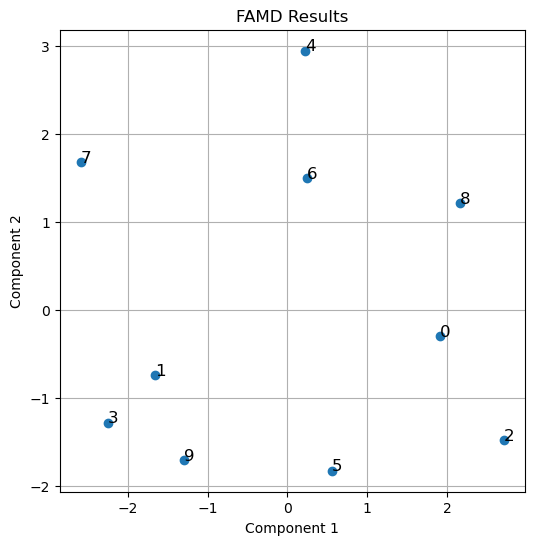

In [36]:
# Plot the results using matplotlib
plt.figure(figsize=(6, 6))
plt.scatter(famd_transformed[0], famd_transformed[1])

# Annotate points with their index
for i, (x, y) in enumerate(zip(famd_transformed[0], famd_transformed[1])):
    plt.text(x, y, str(i), fontsize=12)

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('FAMD Results')
plt.grid(True)
plt.show()

In [37]:
# Display the contribution of variables to the components
contributions = famd.column_contributions_
print("Contribution of variables to the components:")
print(contributions)


Contribution of variables to the components:
component            0         1
variable                        
Numerical1    0.085811  0.073341
Numerical2    0.228898  0.029682
Categorical1  0.215670  0.199824
Categorical2  0.039613  0.308654
Categorical3  0.201577  0.089507


In [38]:
# Display the cosine squared (cos^2) values to indicate the quality of representation of variables
cos_squared = famd.column_cosine_similarities_
print("Cosine Squared (cos^2) values for variables:")
print(cos_squared)


Cosine Squared (cos^2) values for variables:
<bound method FAMD.column_cosine_similarities_ of FAMD(random_state=42)>


## Conclusion

FAMD is a powerful technique for analyzing and visualizing mixed-type data. By reducing the dimensionality of the data, FAMD helps in uncovering patterns and relationships that may not be immediately apparent. Understanding the mathematical foundations and implementation of FAMD can greatly enhance your ability to work with heterogeneous datasets.

Using tools like prince allows us to efficiently perform FAMD on large datasets, providing insights into the underlying structure of the data. Whether in marketing, social sciences, or other fields, FAMD is a valuable method for exploring and interpreting mixed-type data.